Assignment 2: 
Saksham Srivastava
2110110452

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
import seaborn as sns


_Question 2_

2. This question uses the WHO life expectancy dataset available at:
https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who. It contains life-expectancy data
for 193 countries from 2000 to 2015. The dataset has 22 columns shown below. One of these is life-expectancy
(dependent variable). If we remove country, year and status we are left with 18 variables (numeric) that can
potentially influence life-expectancy.
Columns:
Country, Year, Status, Life expectancy, Adult Mortality, infant deaths,
Alcohol, percentage expenditure, Hepatitis B, Measles, BMI , under-five
deaths, Polio, Total expenditure, Diphtheria, HIV/AIDS, GDP, Population,
thinness 10-19 years, thinness 5-9 years, Income composition of resources,
Schooling
.
Note: ’thinness 1-19’ in the orininal columns has been changed to ’thinness 10-19’ since ’1-19’ seems to be a
typo .
Extract the data for countries in South Asia (Indian subcontinent) - namely Afghanistan, Bangladesh, Bhutan,
India, Nepal, Pakistan, Sri Lanka - and use simple/multi-regression and data visualization to answer the
following questions. Your answers can be in the form of tables, graphs or other plots, or other kinds of
visualizations.
1. Which are the top 5 independent variables that affect life-expectancy in the concerned countries?
2. What percentage of variance is explained by the top 5 independent variables in each case?
3. Is education (schooling) an important variable for life-expectancy?
4. How important is immunization for life-expectancy? 

In [12]:
dataset = pd.read_csv('archive/Life Expectancy Data.csv')
dataset.dropna(inplace=True)
print(dataset.head())


       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [13]:
dataset_Afg = dataset[dataset['Country'] == 'Afghanistan']
dataset_Ban = dataset[dataset['Country'] == 'Bangladesh']
dataset_Bhu = dataset[dataset['Country'] == 'Bhutan']
dataset_Ind = dataset[dataset['Country'] == 'India']
dataset_Nep = dataset[dataset['Country'] == 'Nepal']
dataset_Pak = dataset[dataset['Country'] == 'Pakistan']
dataset_Sri = dataset[dataset['Country'] == 'Sri Lanka']


In [14]:
dataset_Ind


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1187,India,2014,Developing,68.0,184.0,957,3.07,86.521539,79.0,79563,...,84.0,4.69,85.0,0.2,1573.118890,1.293859e+09,26.8,27.4,0.607,11.6
1188,India,2013,Developing,67.6,187.0,1000,3.11,67.672304,7.0,13822,...,82.0,4.53,83.0,0.2,1452.195373,1.278562e+08,26.8,27.5,0.599,11.5
1189,India,2012,Developing,67.3,19.0,1100,3.10,64.969645,73.0,18668,...,79.0,4.39,82.0,0.2,1446.985410,1.263659e+08,26.9,27.6,0.590,11.3
1190,India,2011,Developing,66.8,193.0,1100,3.00,64.605901,44.0,33634,...,79.0,4.33,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
1191,India,2010,Developing,66.4,196.0,1200,2.77,57.733599,38.0,31458,...,76.0,4.28,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4
1192,India,2009,Developing,66.0,2.0,1300,2.50,0.844186,37.0,56188,...,73.0,4.38,74.0,0.2,19.317765,1.214271e+08,27.0,27.8,0.563,10.5
1193,India,2008,Developing,65.5,23.0,1300,1.93,43.030433,29.0,44258,...,69.0,4.34,7.0,0.3,991.484634,1.197147e+08,27.0,27.9,0.556,10.2
1194,India,2007,Developing,65.2,26.0,1400,1.59,5.234770,6.0,41144,...,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1195,India,2006,Developing,64.8,28.0,1500,1.37,34.859427,6.0,64185,...,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7
1196,India,2005,Developing,64.4,211.0,1500,1.27,3.509637,8.0,36711,...,65.0,4.28,65.0,0.3,77.819000,1.144119e+09,27.2,28.1,0.526,9.4


Do the same thing for all the different countries

In [15]:
y_Afg = dataset_Afg['Life expectancy ']
dataset_Afg = dataset_Afg.drop(
    columns=(['Country', 'Status', 'Year']))
y_Ban = dataset_Ban['Life expectancy ']
dataset_Ban = dataset_Ban.drop(
    columns=['Country', 'Status', 'Year'])
y_Bhu = dataset_Bhu['Life expectancy ']
dataset_Bhu = dataset_Bhu.drop(
    columns=['Country', 'Status', 'Year'])
y_Nep = dataset_Nep['Life expectancy ']
dataset_Nep = dataset_Nep.drop(
    columns=['Country', 'Status', 'Year'])
y_Ind = dataset_Ind['Life expectancy ']
dataset_Ind = dataset_Ind.drop(
    columns=['Country', 'Status', 'Year'])
y_Pak = dataset_Pak['Life expectancy ']
dataset_Pak = dataset_Pak.drop(
    columns=['Country', 'Status', 'Year'])
y_Sri = dataset_Sri['Life expectancy ']
dataset_Sri = dataset_Sri.drop(
    columns=['Country', 'Status', 'Year'])


In [16]:
corr_Afg = dataset_Afg.corr()['Life expectancy ']
top_5_variables_Afg = corr_Afg.nlargest(6).index
print("Afghanistan: ", top_5_variables_Afg[1:])


Afghanistan:  Index([' BMI ', 'Income composition of resources', 'Schooling',
       'percentage expenditure', 'GDP'],
      dtype='object')


We can see that the Life expectancy for people in Afghanistan depends on the above factors the most. The correlation also returns Life Expectancy itself, but it is the same column so we do not have to worry about.

_Doing the same for every other country now_

In [17]:
# Bangladesh
corr_Ban = dataset_Ban.corr()['Life expectancy ']
top_5_variables_Ban = corr_Ban.nlargest(6).index
print("Bangladesh: ", top_5_variables_Ban[1:])

# Bhutan
corr_Bhu = dataset_Bhu.corr()['Life expectancy ']
top_5_variables_Bhu = corr_Bhu.nlargest(6).index
print("Bhutan: ", top_5_variables_Bhu[1:])

# India
corr_Ind = dataset_Ind.corr()['Life expectancy ']
top_5_variables_Ind = corr_Ind.nlargest(6).index
print("India: ", top_5_variables_Ind[1:])

# Nepal
corr_Nep = dataset_Nep.corr()['Life expectancy ']
top_5_variables_Nep = corr_Nep.nlargest(6).index
print("Nepal: ", top_5_variables_Nep[1:])

# Pakistan
corr_Pak = dataset_Pak.corr()['Life expectancy ']
top_5_variables_Pak = corr_Pak.nlargest(6).index
print("Pakistan: ", top_5_variables_Pak[1:])

# Sri Lanka
corr_Sri = dataset_Sri.corr()['Life expectancy ']
top_5_variables_Sri = corr_Sri.nlargest(6).index
print("Sri Lanka: ", top_5_variables_Sri[1:])


Bangladesh:  Index(['Schooling', 'Total expenditure', 'Income composition of resources',
       ' BMI ', ' thinness 5-9 years'],
      dtype='object')
Bhutan:  Index(['Schooling', ' HIV/AIDS', 'Diphtheria ',
       'Income composition of resources', 'GDP'],
      dtype='object')
India:  Index([' BMI ', 'Income composition of resources', 'Schooling', 'Polio',
       'Alcohol'],
      dtype='object')
Nepal:  Index([' BMI ', 'Income composition of resources', 'Schooling', 'Hepatitis B',
       'percentage expenditure'],
      dtype='object')
Pakistan:  Index(['Income composition of resources', 'Schooling', 'Population',
       'Hepatitis B', 'percentage expenditure'],
      dtype='object')
Sri Lanka:  Index(['Diphtheria ', 'Polio', 'Alcohol', 'Schooling',
       'Income composition of resources'],
      dtype='object')


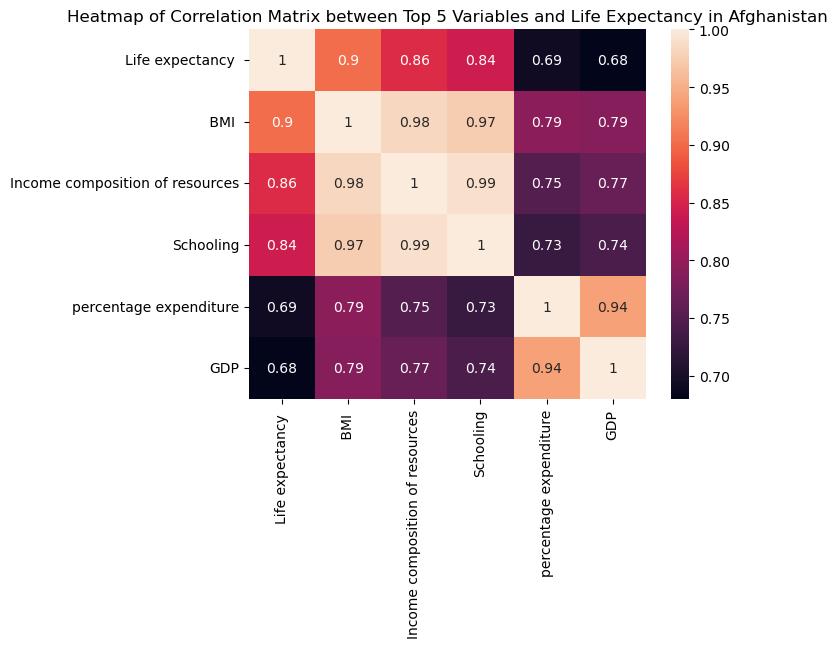

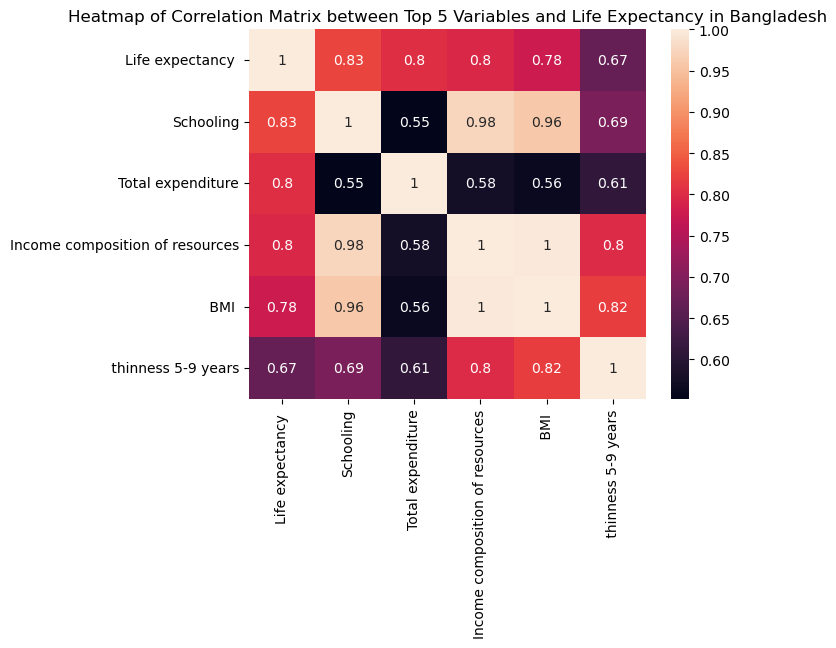

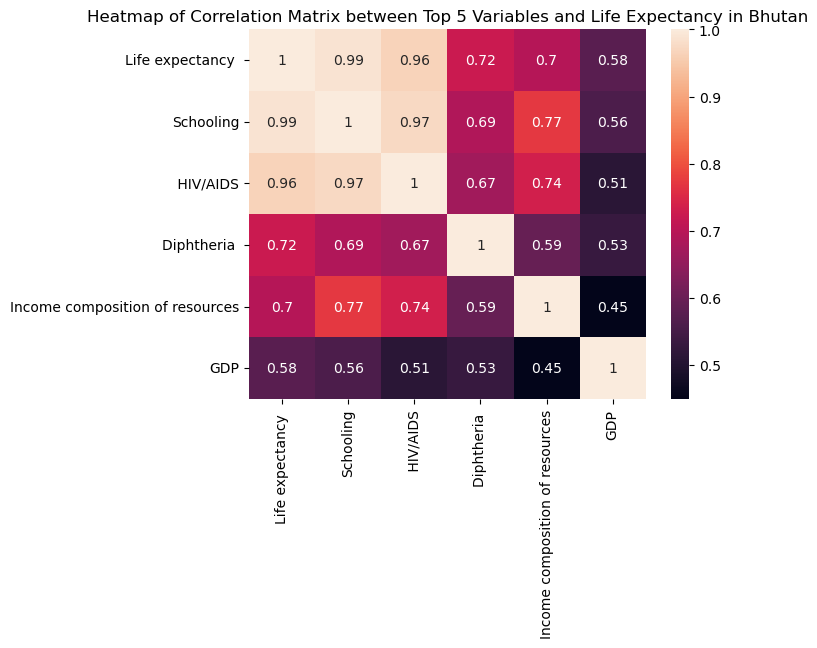

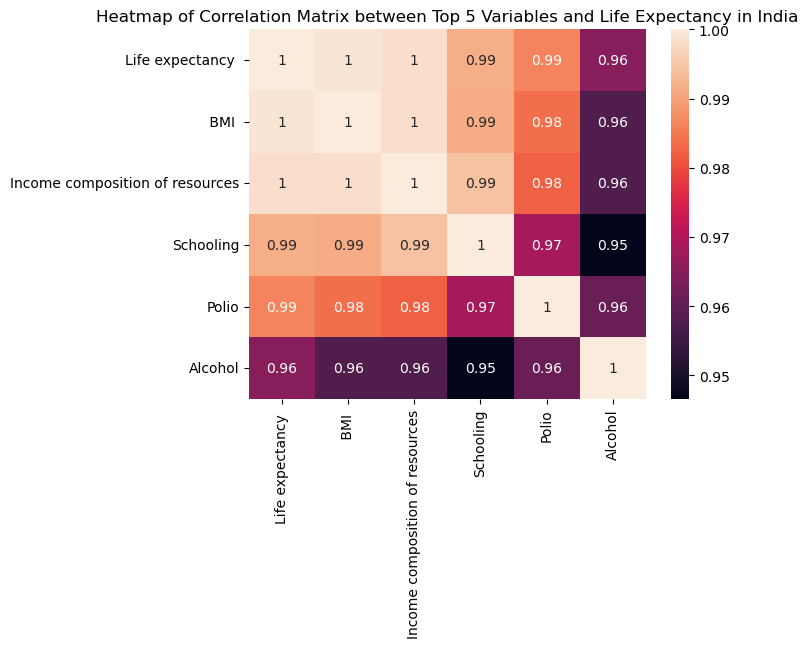

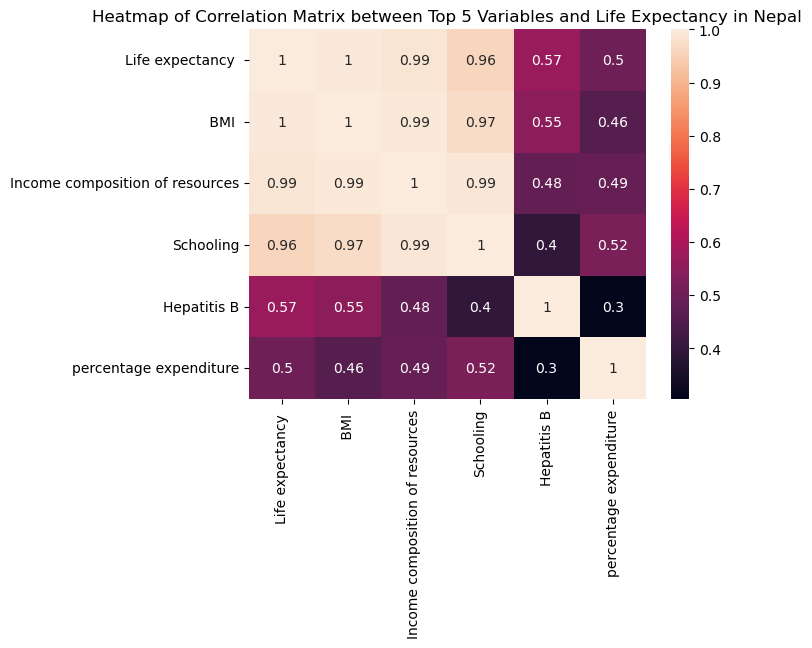

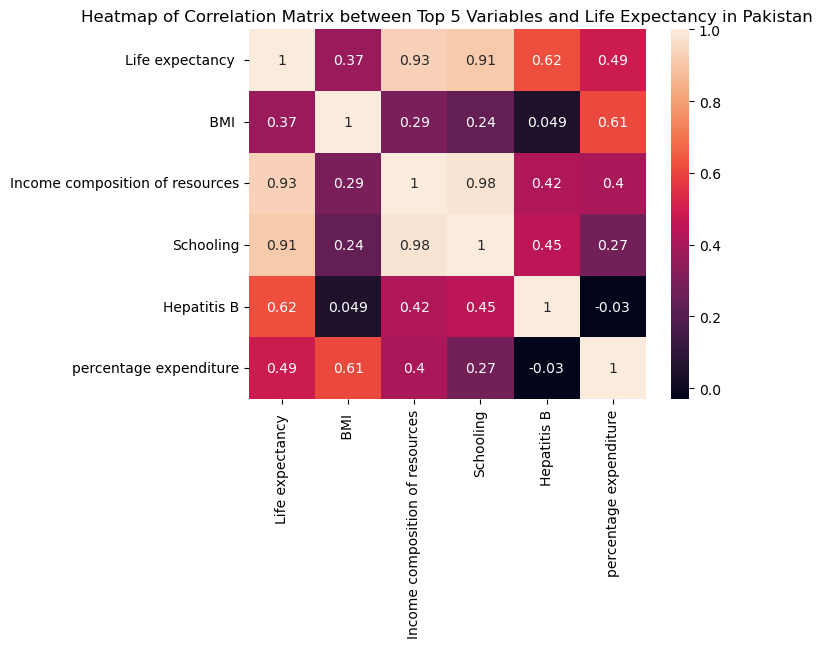

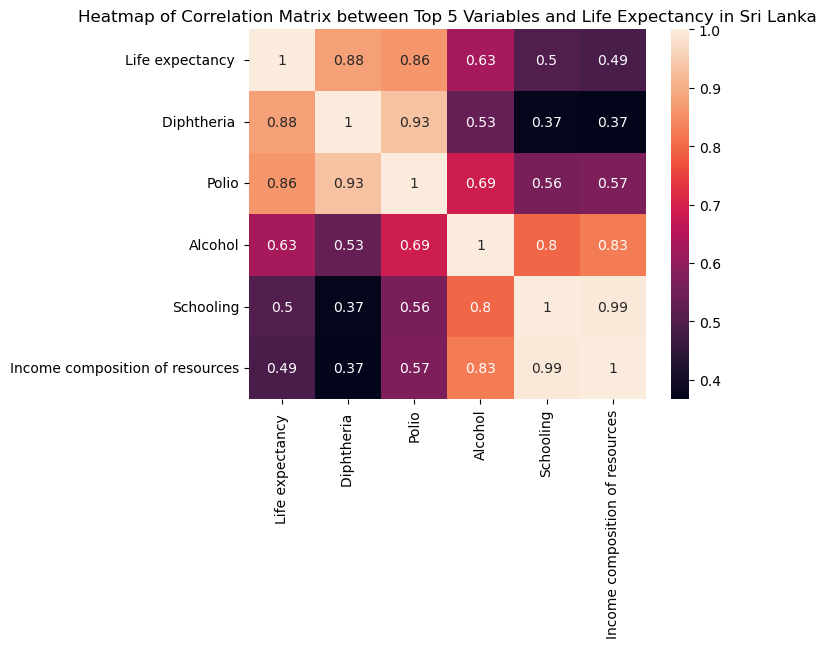

In [18]:
correlation_matrix = dataset_Afg[(list(top_5_variables_Afg))].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Heatmap of Correlation Matrix between Top 5 Variables and Life Expectancy in Afghanistan')
plt.show()


correlation_matrix = dataset_Ban[(list(top_5_variables_Ban))].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Heatmap of Correlation Matrix between Top 5 Variables and Life Expectancy in Bangladesh')
plt.show()

correlation_matrix = dataset_Bhu[(list(top_5_variables_Bhu))].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Heatmap of Correlation Matrix between Top 5 Variables and Life Expectancy in Bhutan')
plt.show()

correlation_matrix = dataset_Ind[(list(top_5_variables_Ind))].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title(
    'Heatmap of Correlation Matrix between Top 5 Variables and Life Expectancy in India')
plt.show()

correlation_matrix = dataset_Nep[(list(top_5_variables_Nep))].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title(
    'Heatmap of Correlation Matrix between Top 5 Variables and Life Expectancy in Nepal')
plt.show()

correlation_matrix = dataset_Pak[(list(top_5_variables_Nep))].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title(
    'Heatmap of Correlation Matrix between Top 5 Variables and Life Expectancy in Pakistan')
plt.show()

correlation_matrix = dataset_Sri[(list(top_5_variables_Sri))].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title(
    'Heatmap of Correlation Matrix between Top 5 Variables and Life Expectancy in Sri Lanka')
plt.show()


In [19]:
top_5_variables_Afg = top_5_variables_Afg[1:]
top_5_variables_Ban = top_5_variables_Ban[1:]
top_5_variables_Bhu = top_5_variables_Bhu[1:]
top_5_variables_Ind = top_5_variables_Ind[1:]
top_5_variables_Nep = top_5_variables_Nep[1:]
top_5_variables_Pak = top_5_variables_Pak[1:]
top_5_variables_Sri = top_5_variables_Sri[1:]


In [20]:
model_Afg = LinearRegression()
model_Afg.fit(dataset_Afg[top_5_variables_Afg],
              dataset_Afg["Life expectancy "])
r_squared = model_Afg.score(
    dataset_Afg[top_5_variables_Afg], dataset_Afg['Life expectancy '])

# Calculate the percentage of variance explained by the top 5 independent variables
percentage_variance_explained = r_squared * 100

# Print the percentage of variance explained
print('The percentage of variance explained by the top 5 independent variables for Afghanistan is {}%.'.format(
    percentage_variance_explained))


The percentage of variance explained by the top 5 independent variables for Afghanistan is 85.35148782313719%.


In [21]:
top_5_variables_Afg


Index([' BMI ', 'Income composition of resources', 'Schooling',
       'percentage expenditure', 'GDP'],
      dtype='object')

In [22]:
model_Ban = LinearRegression()
model_Ban.fit(dataset_Ban[top_5_variables_Ban],
              dataset_Ban["Life expectancy "])
r_squared = model_Ban.score(
    dataset_Ban[top_5_variables_Ban], dataset_Ban['Life expectancy '])

# Calculate the percentage of variance explained by the top 5 independent variables
percentage_variance_explained = r_squared * 100

# Print the percentage of variance explained
print('The percentage of variance explained by the top 5 independent variables for Bangladesh is {}%.'.format(
    percentage_variance_explained))


The percentage of variance explained by the top 5 independent variables for Bangladesh is 89.2981874694832%.


In [23]:
top_5_variables_Ban


Index(['Schooling', 'Total expenditure', 'Income composition of resources',
       ' BMI ', ' thinness 5-9 years'],
      dtype='object')

In [24]:
model_Bhu = LinearRegression()
model_Bhu.fit(dataset_Bhu[top_5_variables_Bhu],
              dataset_Bhu["Life expectancy "])
r_squared = model_Bhu.score(
    dataset_Bhu[top_5_variables_Bhu], dataset_Bhu['Life expectancy '])

# Calculate the percentage of variance explained by the top 5 independent variables
percentage_variance_explained = r_squared * 100

# Print the percentage of variance explained
print('The percentage of variance explained by the top 5 independent variables for Bhutan is {}%.'.format(
    percentage_variance_explained))


The percentage of variance explained by the top 5 independent variables for Bhutan is 99.42079533697398%.


In [25]:
top_5_variables_Bhu


Index(['Schooling', ' HIV/AIDS', 'Diphtheria ',
       'Income composition of resources', 'GDP'],
      dtype='object')

In [26]:
model_Ind = LinearRegression()
model_Ind.fit(dataset_Ind[top_5_variables_Ind],
              dataset_Ind["Life expectancy "])
r_squared = model_Ind.score(
    dataset_Ind[top_5_variables_Ind], dataset_Ind['Life expectancy '])

# Calculate the percentage of variance explained by the top 5 independent variables
percentage_variance_explained = r_squared * 100

# Print the percentage of variance explained
print('The percentage of variance explained by the top 5 independent variables for India is {}%.'.format(
    percentage_variance_explained))


The percentage of variance explained by the top 5 independent variables for India is 99.919271308303%.


In [27]:
top_5_variables_Ind


Index([' BMI ', 'Income composition of resources', 'Schooling', 'Polio',
       'Alcohol'],
      dtype='object')

In [28]:
model_Nep = LinearRegression()
model_Nep.fit(dataset_Nep[top_5_variables_Nep],
              dataset_Nep["Life expectancy "])
r_squared = model_Nep.score(
    dataset_Nep[top_5_variables_Nep], dataset_Nep['Life expectancy '])

# Calculate the percentage of variance explained by the top 5 independent variables
percentage_variance_explained = r_squared * 100

# Print the percentage of variance explained
print('The percentage of variance explained by the top 5 independent variables for Nepal is {}%.'.format(
    percentage_variance_explained))


The percentage of variance explained by the top 5 independent variables for Nepal is 99.61317338711804%.


In [29]:
top_5_variables_Nep


Index([' BMI ', 'Income composition of resources', 'Schooling', 'Hepatitis B',
       'percentage expenditure'],
      dtype='object')

In [30]:
model_Pak = LinearRegression()
model_Pak.fit(dataset_Pak[top_5_variables_Pak],
              dataset_Pak["Life expectancy "])
r_squared = model_Pak.score(
    dataset_Pak[top_5_variables_Pak], dataset_Pak['Life expectancy '])

# Calculate the percentage of variance explained by the top 5 independent variables
percentage_variance_explained = r_squared * 100

# Print the percentage of variance explained
print('The percentage of variance explained by the top 5 independent variables for Pakistan is {}%.'.format(
    percentage_variance_explained))


The percentage of variance explained by the top 5 independent variables for Pakistan is 98.45818626412391%.


In [31]:
top_5_variables_Pak


Index(['Income composition of resources', 'Schooling', 'Population',
       'Hepatitis B', 'percentage expenditure'],
      dtype='object')

In [32]:
model_Sri = LinearRegression()
model_Sri.fit(dataset_Sri[top_5_variables_Sri],
              dataset_Sri["Life expectancy "])
r_squared = model_Sri.score(
    dataset_Sri[top_5_variables_Sri], dataset_Sri['Life expectancy '])

# Calculate the percentage of variance explained by the top 5 independent variables
percentage_variance_explained = r_squared * 100

# Print the percentage of variance explained
print('The percentage of variance explained by the top 5 independent variables for Sri Lanka is {}%.'.format(
    percentage_variance_explained))


The percentage of variance explained by the top 5 independent variables for Sri Lanka is 82.96149945430773%.


In [33]:
top_5_variables_Sri


Index(['Diphtheria ', 'Polio', 'Alcohol', 'Schooling',
       'Income composition of resources'],
      dtype='object')

_Is education (schooling) an important variable for life-expectancy?_


Yes. Schooling is a very important factor for life expectancy as we can see it is one of the top 5 most important variables for every country.

_How important is immunization for life-expectancy?_

For every country other than Afghanistan and Bangladesh, diseases are an important factor for life expectancy, with a high correlation between them, as shown in the heatmaps.
So we can conclude that it is in fact a good indicator of life expectancy.